In [313]:
import numpy as np
import pandas as pd
import math
import keras.backend as K
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils import plot_model
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from tensorflow.keras.utils import model_to_dot
from keras.callbacks import LambdaCallback
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD
from keras.callbacks import LearningRateScheduler
%matplotlib inline
init_notebook_mode(connected=True)

In [314]:
import graphviz
import pydot
import plotly.express as px
import visualkeras
import os

In [429]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018
#Model
NO_EPOCHS = 50
BATCH_SIZE = 128

IS_LOCAL = True



if(IS_LOCAL):
    PATH="C:/Users/souvi/PycharmProjects/fashion ML/input/data/"  # Replace this with the path to your local directory
else:
    PATH="../input/"
print(os.listdir(PATH))

['fashion-mnist_test.csv', 'fashion-mnist_train.csv', 't10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte', 'train-images-idx3-ubyte', 'train-labels-idx1-ubyte']


In [430]:
train_file = PATH+"fashion-mnist_train.csv"
test_file  = PATH+"fashion-mnist_test.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [433]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(train_data)

Pullover            :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
Shirt               :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Trouser             :   6000 or 10.0%


C:\Users\souvi\AppData\Local\Temp\ipykernel_9148\851456882.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\souvi\AppData\Local\Temp\ipykernel_9148\851456882.py:34: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



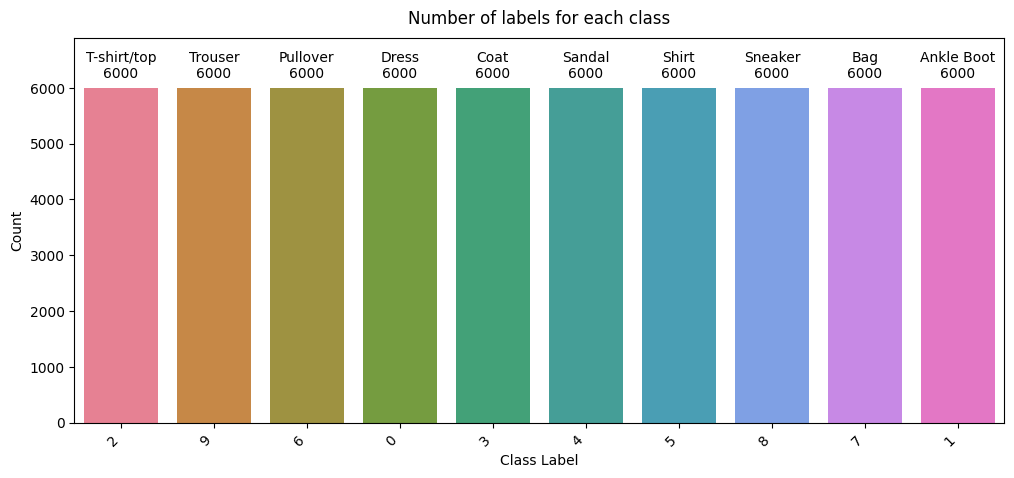

In [434]:
def plot_label_per_class(data):
    f, ax = plt.subplots(1, 1, figsize=(12, 5))  # Increased the height for better spacing
    
    # Plot the count of each label
    #g = sns.countplot(x="label", data=data, order=data["label"].value_counts().index)

     # Use a colorful palette
    palette = sns.color_palette("husl", len(labels))  # 'husl' is a colorful palette with distinct colors
    
    # Plot the count of each label with the colorful palette
    g = sns.countplot(x="label", data=data, order=data["label"].value_counts().index, palette=palette)
    
    # Adjust the title with padding
    g.set_title("Number of labels for each class", pad=10)
    
    # Adjust x and y labels
    g.set_xlabel("Class Label")
    g.set_ylabel("Count")
    
    # Add some space above the bars to avoid overlap
    g.set_ylim(0, data["label"].value_counts().max() * 1.15)
    
    # Annotate each bar with the label name and count
    for p in g.patches:
        count = int(p.get_height())
        label_index = int(p.get_x() + p.get_width() / 2)
        label = labels[label_index]
        g.annotate(f"{label}\n{count}", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom', fontsize=10, color='black', 
                   xytext=(0, 5), textcoords='offset points')
    
    # Rotate x-axis labels if necessary
    g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')
    
    plt.show()

plot_label_per_class(train_data)

In [435]:
get_classes_distribution(test_data)

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%


C:\Users\souvi\AppData\Local\Temp\ipykernel_9148\851456882.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\souvi\AppData\Local\Temp\ipykernel_9148\851456882.py:34: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



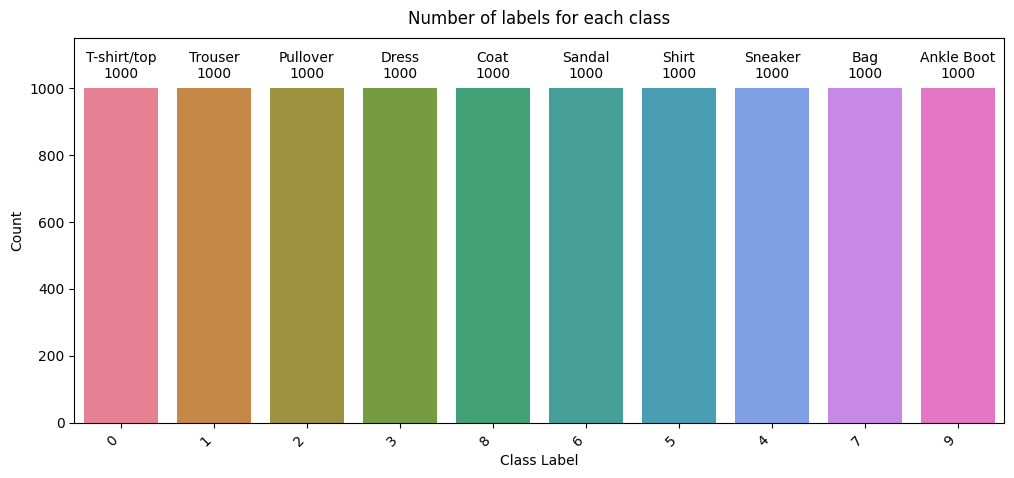

In [436]:
plot_label_per_class(test_data)

In [437]:
item = {0: 'Top',
        1: 'Trouser',
        2: 'Jacket',
        3: 'Dress',
        4: 'Coat',
        5: 'Sandal',
        6: 'Shirt',
        7: 'Shoes',
        8: 'Bag',
        9: 'Boots'
        }

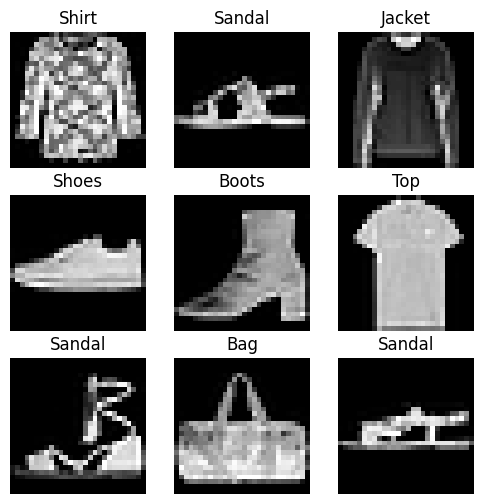

In [438]:
fig, axes = plt.subplots(3, 3, figsize = (6,6))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = train_data.drop('label', axis=1).values[index].reshape(28,28)
        cloths = train_data['label'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(item[cloths])
        axe.set_axis_off()

In [439]:
# data preprocessing
def data_preprocessing(raw):
    # Convert labels to one-hot encoding (a 2D array)
    out_y = to_categorical(raw.label, NUM_CLASSES)
    # Number of images in the dataset
    num_images = raw.shape[0]
    # Extracting the pixel values (excluding the label column)
    x_as_array = raw.values[:,1:]
    # Reshape into 4D array for CNN input (#examples, height, weight, channels)
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    # Normalize pixel values to the range [0, 1]
    out_x = x_shaped_array / 255
    return out_x, out_y

In [440]:
# prepare the data
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

In [441]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [442]:
print("Train Set -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Validation Set -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Test Set -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Train Set -  rows: 48000  columns: (28, 28, 1)
Validation Set -  rows: 12000  columns: (28, 28, 1)
Test Set -  rows: 10000  columns: (28, 28, 1)


In [116]:
class LRFinder:
    """
    Plots the change of the loss function of a Keras model when the learning rate is exponentially increasing.
    See for details:
    https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0
    """
    def __init__(self, model):
        self.model = model
        self.losses = []
        self.lrs = []
        self.best_loss = 1e9

    def on_batch_end(self, batch, logs):
        # Log the learning rate
        lr = K.get_value(self.model.optimizer.lr)
        self.lrs.append(lr)

        # Log the loss
        loss = logs['loss']
        self.losses.append(loss)

        # Check whether the loss got too large or NaN
        if math.isnan(loss) or loss > self.best_loss * 4:
            self.model.stop_training = True
            return

        if loss < self.best_loss:
            self.best_loss = loss

        # Increase the learning rate for the next batch
        lr *= self.lr_mult
        K.set_value(self.model.optimizer.lr, lr)

    def find(self, x_train, y_train, start_lr, end_lr, batch_size=64, epochs=1):
        num_batches = epochs * x_train.shape[0] / batch_size
        self.lr_mult = (float(end_lr) / float(start_lr)) ** (float(1) / float(num_batches))

        # Save weights into a file
        self.model.save_weights('tmp.h5')

        # Remember the original learning rate
        original_lr = K.get_value(self.model.optimizer.lr)

        # Set the initial learning rate
        K.set_value(self.model.optimizer.lr, start_lr)

        callback = LambdaCallback(on_batch_end=lambda batch, logs: self.on_batch_end(batch, logs))

        self.model.fit(x_train, y_train,
                        batch_size=batch_size, epochs=epochs,
                        callbacks=[callback])

        # Restore the weights to the state before model fitting
        self.model.load_weights('tmp.h5')

        # Restore the original learning rate
        K.set_value(self.model.optimizer.lr, original_lr)

    def plot_loss(self, n_skip_beginning=10, n_skip_end=5):
        """
        Plots the loss.
        Parameters:
            n_skip_beginning - number of batches to skip on the left.
            n_skip_end - number of batches to skip on the right.
        """
        plt.ylabel("loss")
        plt.xlabel("learning rate (log scale)")
        plt.plot(self.lrs[n_skip_beginning:-n_skip_end], self.losses[n_skip_beginning:-n_skip_end])
        plt.xscale('log')

    def plot_loss_change(self, sma=1, n_skip_beginning=10, n_skip_end=5, y_lim=(-0.01, 0.01)):
        """
        Plots rate of change of the loss function.
        Parameters:
            sma - number of batches for simple moving average to smooth out the curve.
            n_skip_beginning - number of batches to skip on the left.
            n_skip_end - number of batches to skip on the right.
            y_lim - limits for the y axis.
        """
        assert sma >= 1
        derivatives = [0] * sma
        for i in range(sma, len(self.lrs)):
            derivative = (self.losses[i] - self.losses[i - sma]) / sma
            derivatives.append(derivative)

        plt.ylabel("rate of loss change")
        plt.xlabel("learning rate (log scale)")
        plt.plot(self.lrs[n_skip_beginning:-n_skip_end], derivatives[n_skip_beginning:-n_skip_end])
        plt.xscale('log')
        plt.ylim(y_lim)

In [26]:
# Model ADAM

model_adam = Sequential()
# Add convolution 2D
model_adam.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(IMG_ROWS, IMG_COLS, 1)))
model_adam.add(MaxPooling2D((2, 2)))

model_adam.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_adam.add(MaxPooling2D(pool_size=(2, 2)))

model_adam.add(Conv2D(128, (3, 3), activation='relu'))
model_adam.add(Flatten())
model_adam.add(Dense(128, activation='relu'))
model_adam.add(Dense(NUM_CLASSES, activation='softmax'))


model_adam.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
train_model_adam = model_adam.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50


375/375 [==============================] - 12s 28ms/step - loss: 0.5449 - accuracy: 0.8023 - val_loss: 0.3825 - val_accuracy: 0.8625
Epoch 2/50
375/375 [==============================] - 12s 33ms/step - loss: 0.3447 - accuracy: 0.8755 - val_loss: 0.3204 - val_accuracy: 0.8852
Epoch 3/50
375/375 [==============================] - 12s 32ms/step - loss: 0.2931 - accuracy: 0.8925 - val_loss: 0.2963 - val_accuracy: 0.8978
Epoch 4/50
375/375 [==============================] - 12s 32ms/step - loss: 0.2603 - accuracy: 0.9044 - val_loss: 0.2756 - val_accuracy: 0.9044
Epoch 5/50
375/375 [==============================] - 12s 33ms/step - loss: 0.2319 - accuracy: 0.9143 - val_loss: 0.2709 - val_accuracy: 0.9057
Epoch 6/50
375/375 [==============================] - 12s 32ms/step - loss: 0.2099 - accuracy: 0.9219 - val_loss: 0.2665 - val_accuracy: 0.9053
Epoch 7/50
375/375 [==============================] - 12s 32ms/step - loss: 0.1864 - accuracy: 0.9316 - val_loss: 0.2757 - val_accurac

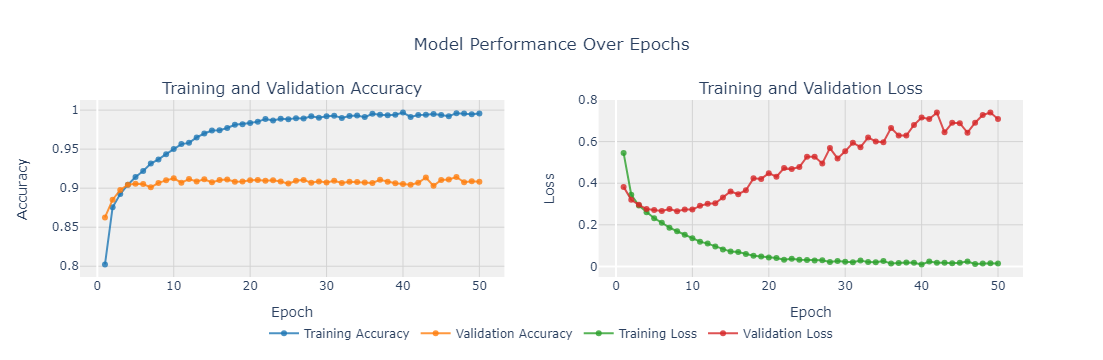

In [28]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

def create_trace(x, y, name, color):
    trace = go.Scatter(
        x=x,
        y=y,
        name=name,
        line=dict(color=color, width=2),
        mode="lines+markers",
        marker=dict(size=6),
        hovertemplate=f'{name}: %{y}<extra></extra>',  # Removed specific formatting
    )
    return trace

def plot_accuracy_and_loss(train_model_adam):
    hist = train_model_adam.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1, len(acc) + 1))

    # Create traces
    trace_ta = create_trace(epochs, acc, "Training Accuracy", "rgba(31, 119, 180, 0.8)")
    trace_va = create_trace(epochs, val_acc, "Validation Accuracy", "rgba(255, 127, 14, 0.8)")
    trace_tl = create_trace(epochs, loss, "Training Loss", "rgba(44, 160, 44, 0.8)")
    trace_vl = create_trace(epochs, val_loss, "Validation Loss", "rgba(214, 39, 40, 0.8)")

    # Subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Training and Validation Accuracy', 'Training and Validation Loss'))

    # Add traces to subplots
    fig.add_trace(trace_ta, row=1, col=1)
    fig.add_trace(trace_va, row=1, col=1)
    fig.add_trace(trace_tl, row=1, col=2)
    fig.add_trace(trace_vl, row=1, col=2)

    # Update layout for aesthetics
    fig.update_layout(
        title='Model Performance Over Epochs',
        title_x=0.5,
        xaxis_title='Epoch',
        xaxis2_title='Epoch',
        yaxis_title='Accuracy',
        yaxis2_title='Loss',
        legend=dict(orientation="h", yanchor="bottom", y=-0.4, xanchor="center", x=0.5),
        plot_bgcolor='rgba(240, 240, 240, 0.95)',
        font=dict(size=12)
    )

    # Update axes for consistency
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

    # Display the plot
    iplot(fig)

# Example usage
plot_accuracy_and_loss(train_model_adam)


In [337]:
score = model_adam.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6917546391487122
Test accuracy: 0.911899983882904


In [338]:
# Model SGD

model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

optimizer = SGD(learning_rate=0.01)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [341]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
375/375 [==============================] - 8s 21ms/step - loss: 1.0303 - accuracy: 0.6314 - val_loss: 0.7086 - val_accuracy: 0.7459
Epoch 2/50
375/375 [==============================] - 9s 23ms/step - loss: 0.6605 - accuracy: 0.7551 - val_loss: 0.6051 - val_accuracy: 0.7799
Epoch 3/50
375/375 [==============================] - 13s 33ms/step - loss: 0.5786 - accuracy: 0.7878 - val_loss: 0.5418 - val_accuracy: 0.7989
Epoch 4/50
375/375 [==============================] - 12s 33ms/step - loss: 0.5311 - accuracy: 0.8064 - val_loss: 0.5100 - val_accuracy: 0.8056
Epoch 5/50
375/375 [==============================] - 13s 34ms/step - loss: 0.5002 - accuracy: 0.8189 - val_loss: 0.4859 - val_accuracy: 0.8213
Epoch 6/50
375/375 [==============================] - 13s 33ms/step - loss: 0.4735 - accuracy: 0.8301 - val_loss: 0.5000 - val_accuracy: 0.8109
Epoch 7/50
375/375 [==============================] - 12s 33ms/step - loss: 0.4528 - accuracy: 0.8370 - val_loss: 0.4391 - val_accuracy: 0

In [342]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2722218632698059
Test accuracy: 0.9014000296592712


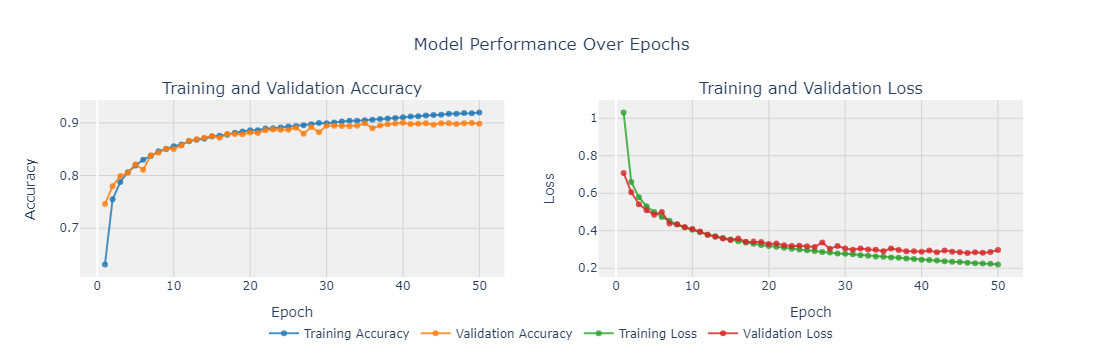

In [344]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

def create_trace(x, y, name, color):
    trace = go.Scatter(
        x=x,
        y=y,
        name=name,
        line=dict(color=color, width=2),
        mode="lines+markers",
        marker=dict(size=6),
        hovertemplate=f'{name}: %{y}<extra></extra>',  # Removed specific formatting
    )
    return trace

def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1, len(acc) + 1))

    # Create traces
    trace_ta = create_trace(epochs, acc, "Training Accuracy", "rgba(31, 119, 180, 0.8)")
    trace_va = create_trace(epochs, val_acc, "Validation Accuracy", "rgba(255, 127, 14, 0.8)")
    trace_tl = create_trace(epochs, loss, "Training Loss", "rgba(44, 160, 44, 0.8)")
    trace_vl = create_trace(epochs, val_loss, "Validation Loss", "rgba(214, 39, 40, 0.8)")

    # Subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Training and Validation Accuracy', 'Training and Validation Loss'))

    # Add traces to subplots
    fig.add_trace(trace_ta, row=1, col=1)
    fig.add_trace(trace_va, row=1, col=1)
    fig.add_trace(trace_tl, row=1, col=2)
    fig.add_trace(trace_vl, row=1, col=2)

    # Update layout for aesthetics
    fig.update_layout(
        title='Model Performance Over Epochs',
        title_x=0.5,
        xaxis_title='Epoch',
        xaxis2_title='Epoch',
        yaxis_title='Accuracy',
        yaxis2_title='Loss',
        legend=dict(orientation="h", yanchor="bottom", y=-0.4, xanchor="center", x=0.5),
        plot_bgcolor='rgba(240, 240, 240, 0.95)',
        font=dict(size=12)
    )

    # Update axes for consistency
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

    # Display the plot
    iplot(fig)

# Example usage
plot_accuracy_and_loss(train_model)


In [345]:
# Get the predicted probabilities for the test data
predicted_probabilities = model.predict(X_test)

# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Get the true class labels from the test data
y_true = test_data.iloc[:, 0]

# Now you can use predicted_classes and y_true for further evaluation or plotting

313/313 [==============================] - 1s 4ms/step


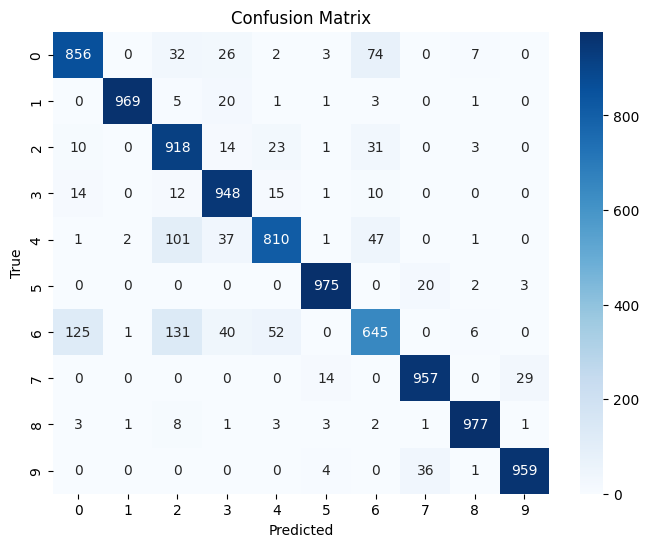

In [346]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_true, predicted_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [347]:
import numpy as np

# Ensure predicted_classes and y_true are numpy arrays
p = np.array(predicted_classes[:10000])
y = np.array(y_true[:10000])

# Ensure that p and y have the same shape
assert p.shape == y.shape, f"Shape mismatch: predicted {p.shape}, true {y.shape}"

# Find indices of correct and incorrect predictions
correct = np.nonzero(p == y)[0]
incorrect = np.nonzero(p != y)[0]

# Output some details for verification
print(f"Number of correct predictions: {len(correct)}")
print(f"Number of incorrect predictions: {len(incorrect)}")

Number of correct predictions: 9014
Number of incorrect predictions: 986


In [348]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.85      0.86      0.85      1000
    Class 1 (Trouser) :       1.00      0.97      0.98      1000
   Class 2 (Pullover) :       0.76      0.92      0.83      1000
      Class 3 (Dress) :       0.87      0.95      0.91      1000
       Class 4 (Coat) :       0.89      0.81      0.85      1000
     Class 5 (Sandal) :       0.97      0.97      0.97      1000
      Class 6 (Shirt) :       0.79      0.65      0.71      1000
    Class 7 (Sneaker) :       0.94      0.96      0.95      1000
        Class 8 (Bag) :       0.98      0.98      0.98      1000
 Class 9 (Ankle Boot) :       0.97      0.96      0.96      1000

               accuracy                           0.90     10000
              macro avg       0.90      0.90      0.90     10000
           weighted avg       0.90      0.90      0.90     10000



## Adding Dropout

In [423]:
# Model with SGD

model_drop = Sequential()
# Add convolution 2D
model_drop.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model_drop.add(MaxPooling2D((2, 2)))

# Add dropouts to the model
model_drop.add(Dropout(0.25))
model_drop.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model_drop.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model_drop.add(Dropout(0.25))
model_drop.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model_drop.add(Dropout(0.4))
model_drop.add(Flatten())
model_drop.add(Dense(128, activation='relu'))
# Add dropouts to the model
model_drop.add(Dropout(0.3))
model_drop.add(Dense(NUM_CLASSES, activation='softmax'))

optimizer = SGD(learning_rate=0.01)

model_drop.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [424]:
#model_drop.summary()

In [425]:
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
# SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [444]:
train_model_drop = model_drop.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
375/375 [==============================] - 14s 37ms/step - loss: 2.2960 - accuracy: 0.1730 - val_loss: 2.2830 - val_accuracy: 0.4047
Epoch 2/50
375/375 [==============================] - 14s 37ms/step - loss: 1.8974 - accuracy: 0.3460 - val_loss: 1.0881 - val_accuracy: 0.6088
Epoch 3/50
375/375 [==============================] - 13s 34ms/step - loss: 1.1261 - accuracy: 0.5734 - val_loss: 0.8450 - val_accuracy: 0.6892
Epoch 4/50
375/375 [==============================] - 13s 36ms/step - loss: 0.9537 - accuracy: 0.6442 - val_loss: 0.7437 - val_accuracy: 0.7257
Epoch 5/50
375/375 [==============================] - 13s 34ms/step - loss: 0.8578 - accuracy: 0.6821 - val_loss: 0.6952 - val_accuracy: 0.7395
Epoch 6/50
375/375 [==============================] - 13s 34ms/step - loss: 0.7940 - accuracy: 0.7021 - val_loss: 0.6498 - val_accuracy: 0.7554
Epoch 7/50
375/375 [==============================] - 13s 35ms/step - loss: 0.7526 - accuracy: 0.7185 - val_loss: 0.6240 - val_accuracy:

In [445]:
score = model_drop.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.38743433356285095
Test accuracy: 0.8565000295639038


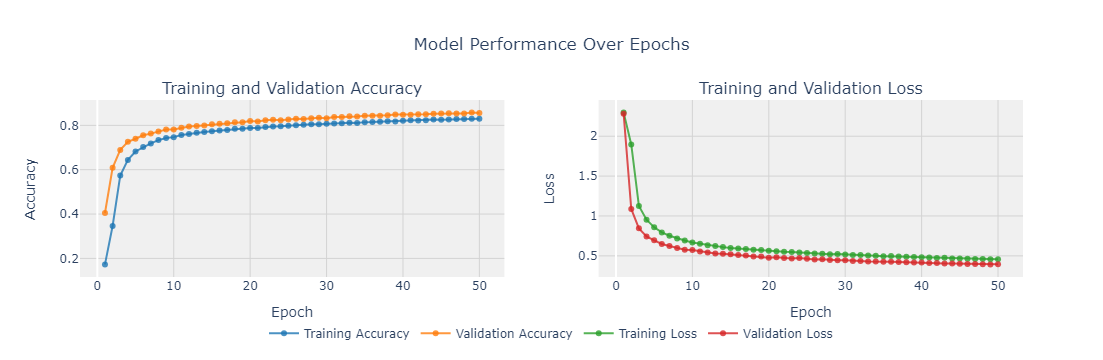

In [446]:
def create_trace(x, y, name, color):
    trace = go.Scatter(
        x=x,
        y=y,
        name=name,
        line=dict(color=color, width=2),
        mode="lines+markers",
        marker=dict(size=6),
        hovertemplate=f'{name}: %{y}<extra></extra>',  # Removed specific formatting
    )
    return trace

def plot_accuracy_and_loss(train_model_drop):
    hist = train_model_drop.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1, len(acc) + 1))

    # Create traces
    trace_ta = create_trace(epochs, acc, "Training Accuracy", "rgba(31, 119, 180, 0.8)")
    trace_va = create_trace(epochs, val_acc, "Validation Accuracy", "rgba(255, 127, 14, 0.8)")
    trace_tl = create_trace(epochs, loss, "Training Loss", "rgba(44, 160, 44, 0.8)")
    trace_vl = create_trace(epochs, val_loss, "Validation Loss", "rgba(214, 39, 40, 0.8)")

    # Subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Training and Validation Accuracy', 'Training and Validation Loss'))

    # Add traces to subplots
    fig.add_trace(trace_ta, row=1, col=1)
    fig.add_trace(trace_va, row=1, col=1)
    fig.add_trace(trace_tl, row=1, col=2)
    fig.add_trace(trace_vl, row=1, col=2)

    # Update layout for aesthetics
    fig.update_layout(
        title='Model Performance Over Epochs',
        title_x=0.5,
        xaxis_title='Epoch',
        xaxis2_title='Epoch',
        yaxis_title='Accuracy',
        yaxis2_title='Loss',
        legend=dict(orientation="h", yanchor="bottom", y=-0.4, xanchor="center", x=0.5),
        plot_bgcolor='rgba(240, 240, 240, 0.95)',
        font=dict(size=12)
    )

    # Update axes for consistency
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

    # Display the plot
    iplot(fig)

# Example usage
plot_accuracy_and_loss(train_model_drop)


In [38]:
# Model with ADAM

model_drop_adam = Sequential()
# Add convolution 2D
model_drop_adam.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model_drop_adam.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model_drop_adam.add(Dropout(0.25))
model_drop_adam.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model_drop_adam.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model_drop_adam.add(Dropout(0.25))
model_drop_adam.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model_drop_adam.add(Dropout(0.4))
model_drop_adam.add(Flatten())
model_drop_adam.add(Dense(128, activation='relu'))
# Add dropouts to the model
model_drop_adam.add(Dropout(0.3))
model_drop_adam.add(Dense(NUM_CLASSES, activation='softmax'))


model_drop_adam.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
train_model_drop_adam = model_drop_adam.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
375/375 [==============================] - 15s 39ms/step - loss: 0.7448 - accuracy: 0.7236 - val_loss: 0.4728 - val_accuracy: 0.8305
Epoch 2/50
375/375 [==============================] - 15s 40ms/step - loss: 0.4743 - accuracy: 0.8255 - val_loss: 0.3771 - val_accuracy: 0.8613
Epoch 3/50
375/375 [==============================] - 15s 39ms/step - loss: 0.4104 - accuracy: 0.8491 - val_loss: 0.3376 - val_accuracy: 0.8755
Epoch 4/50
375/375 [==============================] - 15s 40ms/step - loss: 0.3731 - accuracy: 0.8655 - val_loss: 0.3039 - val_accuracy: 0.8907
Epoch 5/50
375/375 [==============================] - 15s 40ms/step - loss: 0.3435 - accuracy: 0.8746 - val_loss: 0.2881 - val_accuracy: 0.8962
Epoch 6/50
375/375 [==============================] - 15s 40ms/step - loss: 0.3265 - accuracy: 0.8804 - val_loss: 0.2715 - val_accuracy: 0.9020
Epoch 7/50
375/375 [==============================] - 15s 40ms/step - loss: 0.3137 - accuracy: 0.8838 - val_loss: 0.2686 - val_accuracy:

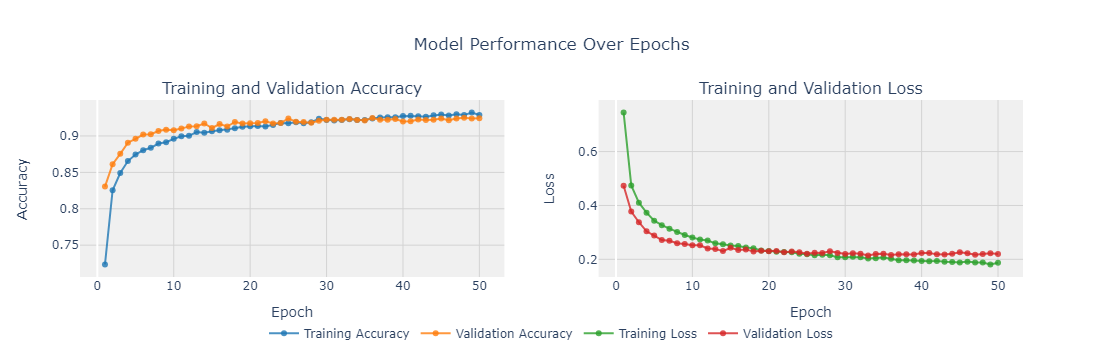

In [427]:
def create_trace(x, y, name, color):
    trace = go.Scatter(
        x=x,
        y=y,
        name=name,
        line=dict(color=color, width=2),
        mode="lines+markers",
        marker=dict(size=6),
        hovertemplate=f'{name}: %{y}<extra></extra>',  # Removed specific formatting
    )
    return trace

def plot_accuracy_and_loss(train_model_drop_adam):
    hist = train_model_drop_adam.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1, len(acc) + 1))

    # Create traces
    trace_ta = create_trace(epochs, acc, "Training Accuracy", "rgba(31, 119, 180, 0.8)")
    trace_va = create_trace(epochs, val_acc, "Validation Accuracy", "rgba(255, 127, 14, 0.8)")
    trace_tl = create_trace(epochs, loss, "Training Loss", "rgba(44, 160, 44, 0.8)")
    trace_vl = create_trace(epochs, val_loss, "Validation Loss", "rgba(214, 39, 40, 0.8)")

    # Subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Training and Validation Accuracy', 'Training and Validation Loss'))

    # Add traces to subplots
    fig.add_trace(trace_ta, row=1, col=1)
    fig.add_trace(trace_va, row=1, col=1)
    fig.add_trace(trace_tl, row=1, col=2)
    fig.add_trace(trace_vl, row=1, col=2)

    # Update layout for aesthetics
    fig.update_layout(
        title='Model Performance Over Epochs',
        title_x=0.5,
        xaxis_title='Epoch',
        xaxis2_title='Epoch',
        yaxis_title='Accuracy',
        yaxis2_title='Loss',
        legend=dict(orientation="h", yanchor="bottom", y=-0.4, xanchor="center", x=0.5),
        plot_bgcolor='rgba(240, 240, 240, 0.95)',
        font=dict(size=12)
    )

    # Update axes for consistency
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

    # Display the plot
    iplot(fig)

# Example usage
plot_accuracy_and_loss(train_model_drop_adam)

In [41]:
score = model_drop_adam.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19693218171596527
Test accuracy: 0.9272000193595886


In [44]:
import numpy as np

# Get the predicted probabilities for the test data
predicted_probabilities = model_drop_adam.predict(X_test)

# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Get the true class labels from the test data
y_true = test_data.iloc[:, 0]

# Now you can use predicted_classes and y_true for further evaluation or plotting

313/313 [==============================] - 1s 4ms/step


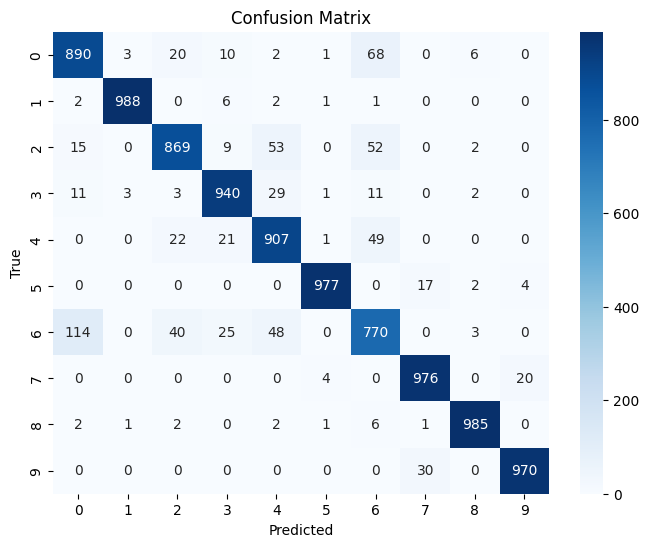

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_true, predicted_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [46]:
import numpy as np

# Ensure predicted_classes and y_true are numpy arrays
p = np.array(predicted_classes[:10000])
y = np.array(y_true[:10000])

# Ensure that p and y have the same shape
assert p.shape == y.shape, f"Shape mismatch: predicted {p.shape}, true {y.shape}"

# Find indices of correct and incorrect predictions
correct = np.nonzero(p == y)[0]
incorrect = np.nonzero(p != y)[0]

# Output some details for verification
print(f"Number of correct predictions: {len(correct)}")
print(f"Number of incorrect predictions: {len(incorrect)}")

Number of correct predictions: 9272
Number of incorrect predictions: 728


In [47]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.86      0.89      0.88      1000
    Class 1 (Trouser) :       0.99      0.99      0.99      1000
   Class 2 (Pullover) :       0.91      0.87      0.89      1000
      Class 3 (Dress) :       0.93      0.94      0.93      1000
       Class 4 (Coat) :       0.87      0.91      0.89      1000
     Class 5 (Sandal) :       0.99      0.98      0.98      1000
      Class 6 (Shirt) :       0.80      0.77      0.79      1000
    Class 7 (Sneaker) :       0.95      0.98      0.96      1000
        Class 8 (Bag) :       0.98      0.98      0.98      1000
 Class 9 (Ankle Boot) :       0.98      0.97      0.97      1000

               accuracy                           0.93     10000
              macro avg       0.93      0.93      0.93     10000
           weighted avg       0.93      0.93      0.93     10000



# New Model

In [388]:
train_file = PATH+"fashion-mnist_train.csv"
test_file  = PATH+"fashion-mnist_test.csv"

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

df = train.copy()
df_test = test.copy()

In [390]:
# Setting Random Seeds for Reproducibilty.
seed = 66
np.random.seed(seed)

In [391]:
X = train.iloc[:,1:]     #select all from second column
Y = train.iloc[:,0]       #select first column, Target variable
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=seed)

In [379]:
# The first parameter in reshape indicates the number of examples.
# We pass it as -1, which means that it is an unknown dimension and we want numpy to figure it out.

# reshape(examples, height, width, channels)
x_train = x_train.values.reshape((-1, 28, 28, 1))
x_test = x_test.values.reshape((-1, 28, 28, 1))

df_test.drop('label', axis=1, inplace=True)
df_test = df_test.values.reshape((-1, 28, 28, 1))

In [380]:
# You need to make sure that your Image is cast into double/float from int before you do this scaling 
# as you will most likely generate floating point numbers.
# And had it been int, the values will be truncated to zero.

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
df_test = df_test.astype("float32")/255

In [381]:
##One Hot Encoding

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [196]:
# Building a ConvNet (WITH ADAM)

model_new = Sequential()
model_new.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model_new.add(BatchNormalization())

model_new.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model_new.add(BatchNormalization())
model_new.add(Dropout(0.25))

model_new.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model_new.add(MaxPooling2D(pool_size=(2, 2)))
model_new.add(Dropout(0.25))
    
    
model_new.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model_new.add(BatchNormalization())
model_new.add(Dropout(0.25))

model_new.add(Flatten())
model_new.add(Dense(512, activation='relu'))
model_new.add(BatchNormalization())
model_new.add(Dropout(0.5))
model_new.add(Dense(128, activation='relu'))
model_new.add(BatchNormalization())
model_new.add(Dropout(0.5))
model_new.add(Dense(10, activation='softmax'))

In [200]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
# Compiling the model
model_new.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [204]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [206]:
from keras.preprocessing.image import ImageDataGenerator

In [207]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images

In [208]:
datagen.fit(x_train)

In [209]:
batch_size = 128
epochs = 40

In [210]:
# Fit the Model
history = model_new.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

C:\Users\souvi\AppData\Local\Temp\ipykernel_9148\2099338239.py:2: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/40
421/421 - 166s - loss: 0.8246 - accuracy: 0.7035 - val_loss: 2.5843 - val_accuracy: 0.4380 - lr: 0.0010 - 166s/epoch - 393ms/step
Epoch 2/40
421/421 - 162s - loss: 0.5439 - accuracy: 0.8010 - val_loss: 0.3572 - val_accuracy: 0.8707 - lr: 9.0000e-04 - 162s/epoch - 384ms/step
Epoch 3/40
421/421 - 148s - loss: 0.4671 - accuracy: 0.8304 - val_loss: 0.3286 - val_accuracy: 0.8748 - lr: 8.1000e-04 - 148s/epoch - 352ms/step
Epoch 4/40
421/421 - 172s - loss: 0.4275 - accuracy: 0.8450 - val_loss: 0.3718 - val_accuracy: 0.8605 - lr: 7.2900e-04 - 172s/epoch - 410ms/step
Epoch 5/40
421/421 - 172s - loss: 0.4012 - accuracy: 0.8546 - val_loss: 0.2919 - val_accuracy: 0.8872 - lr: 6.5610e-04 - 172s/epoch - 408ms/step
Epoch 6/40
421/421 - 170s - loss: 0.3810 - accuracy: 0.8643 - val_loss: 0.2824 - val_accuracy: 0.8928 - lr: 5.9049e-04 - 170s/epoch - 405ms/step
Epoch 7/40
421/421 - 170s - loss: 0.3618 - accuracy: 0.8710 - val_loss: 0.2694 - val_accuracy: 0.8980 - lr: 5.3144e-04 - 170s/epoch - 

In [226]:
X = df_test
Y = to_categorical(test.iloc[:,0])

In [310]:
score = model_new.evaluate(X,Y, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 0.17814311385154724
Test Accuracy: 0.9362999796867371


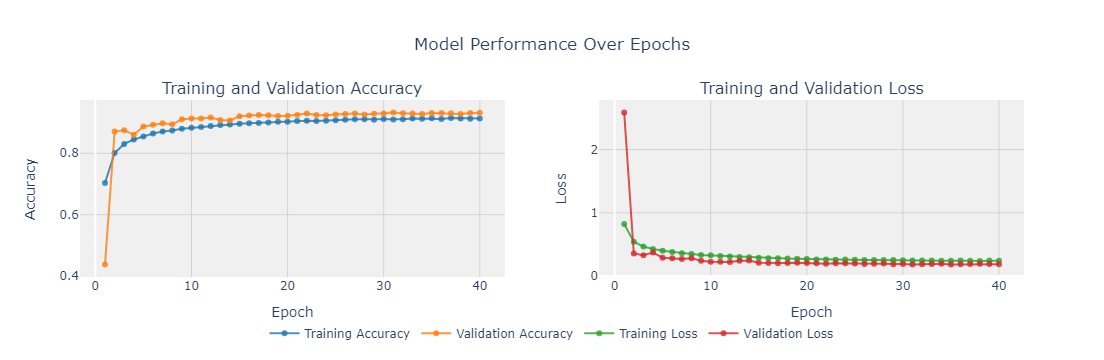

In [228]:
def create_trace(x, y, name, color):
    trace = go.Scatter(
        x=x,
        y=y,
        name=name,
        line=dict(color=color, width=2),
        mode="lines+markers",
        marker=dict(size=6),
        hovertemplate=f'{name}: %{y}<extra></extra>',  # Removed specific formatting
    )
    return trace

def plot_accuracy_and_loss(history):
    hist = history.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1, len(acc) + 1))

    # Create traces
    trace_ta = create_trace(epochs, acc, "Training Accuracy", "rgba(31, 119, 180, 0.8)")
    trace_va = create_trace(epochs, val_acc, "Validation Accuracy", "rgba(255, 127, 14, 0.8)")
    trace_tl = create_trace(epochs, loss, "Training Loss", "rgba(44, 160, 44, 0.8)")
    trace_vl = create_trace(epochs, val_loss, "Validation Loss", "rgba(214, 39, 40, 0.8)")

    # Subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Training and Validation Accuracy', 'Training and Validation Loss'))

    # Add traces to subplots
    fig.add_trace(trace_ta, row=1, col=1)
    fig.add_trace(trace_va, row=1, col=1)
    fig.add_trace(trace_tl, row=1, col=2)
    fig.add_trace(trace_vl, row=1, col=2)

    # Update layout for aesthetics
    fig.update_layout(
        title='Model Performance Over Epochs',
        title_x=0.5,
        xaxis_title='Epoch',
        xaxis2_title='Epoch',
        yaxis_title='Accuracy',
        yaxis2_title='Loss',
        legend=dict(orientation="h", yanchor="bottom", y=-0.4, xanchor="center", x=0.5),
        plot_bgcolor='rgba(240, 240, 240, 0.95)',
        font=dict(size=12)
    )

    # Update axes for consistency
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

    # Display the plot
    iplot(fig)

# Example usage
plot_accuracy_and_loss(history)

In [237]:
# Get the predicted probabilities for the test data
predicted_probabilities = model_new.predict(X)

# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Get the true class labels from the test data
y_true = np.argmax(Y,axis = 1)

# Now you can use predicted_classes and y_true for further evaluation or plotting

313/313 [==============================] - 4s 14ms/step


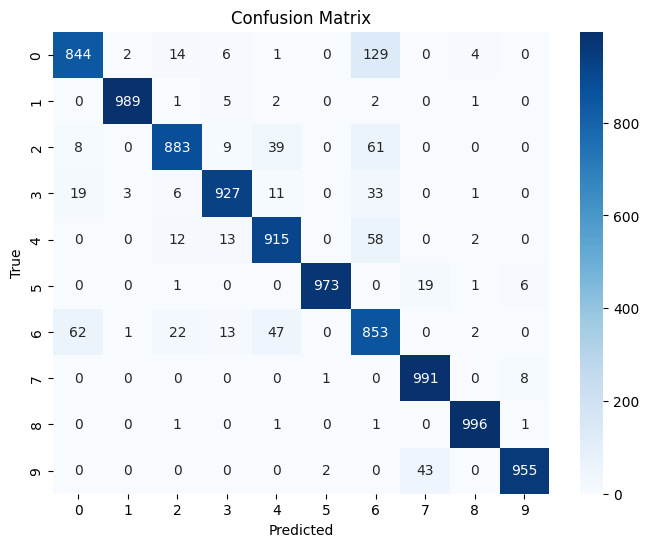

In [238]:
# Calculate the confusion matrix
cm = confusion_matrix(y_true, predicted_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [239]:
import numpy as np

# Ensure predicted_classes and y_true are numpy arrays
p = np.array(predicted_classes[:10000])
y = np.array(y_true[:10000])

# Ensure that p and y have the same shape
assert p.shape == y.shape, f"Shape mismatch: predicted {p.shape}, true {y.shape}"

# Find indices of correct and incorrect predictions
correct = np.nonzero(p == y)[0]
incorrect = np.nonzero(p != y)[0]

# Output some details for verification
print(f"Number of correct predictions: {len(correct)}")
print(f"Number of incorrect predictions: {len(incorrect)}")

Number of correct predictions: 9326
Number of incorrect predictions: 674


In [240]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.90      0.84      0.87      1000
    Class 1 (Trouser) :       0.99      0.99      0.99      1000
   Class 2 (Pullover) :       0.94      0.88      0.91      1000
      Class 3 (Dress) :       0.95      0.93      0.94      1000
       Class 4 (Coat) :       0.90      0.92      0.91      1000
     Class 5 (Sandal) :       1.00      0.97      0.98      1000
      Class 6 (Shirt) :       0.75      0.85      0.80      1000
    Class 7 (Sneaker) :       0.94      0.99      0.97      1000
        Class 8 (Bag) :       0.99      1.00      0.99      1000
 Class 9 (Ankle Boot) :       0.98      0.95      0.97      1000

               accuracy                           0.93     10000
              macro avg       0.94      0.93      0.93     10000
           weighted avg       0.94      0.93      0.93     10000



## Changing epoch and validation split

In [396]:
train_file = PATH+"fashion-mnist_train.csv"
test_file  = PATH+"fashion-mnist_test.csv"

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

df = train.copy()
df_test = test.copy()

In [397]:
X = train.iloc[:,1:]     #select all from second column
Y = train.iloc[:,0]       #select first column, Target variable
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [400]:
# The first parameter in reshape indicates the number of examples.
# We pass it as -1, which means that it is an unknown dimension and we want numpy to figure it out.

# reshape(examples, height, width, channels)
x_train = x_train.values.reshape((-1, 28, 28, 1))
x_test = x_test.values.reshape((-1, 28, 28, 1))

df_test.drop('label', axis=1, inplace=True)
df_test = df_test.values.reshape((-1, 28, 28, 1))

In [402]:
# You need to make sure that your Image is cast into double/float from int before you do this scaling 
# as you will most likely generate floating point numbers.
# And had it been int, the values will be truncated to zero.

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
df_test = df_test.astype("float32")/255

In [403]:
##One Hot Encoding

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [404]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
# Compiling the model
updated_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [260]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [265]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images

In [266]:
datagen.fit(x_train)

In [268]:
batch_size = 128
epochs = 50

In [273]:
# Fit the Model
history = model_new.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Epoch 1/50


C:\Users\souvi\AppData\Local\Temp\ipykernel_9148\2099338239.py:2: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



375/375 - 145s - loss: 0.3140 - accuracy: 0.8873 - val_loss: 0.2424 - val_accuracy: 0.9154 - lr: 0.0010 - 145s/epoch - 387ms/step
Epoch 2/50
375/375 - 153s - loss: 0.3129 - accuracy: 0.8866 - val_loss: 0.2189 - val_accuracy: 0.9183 - lr: 9.0000e-04 - 153s/epoch - 408ms/step
Epoch 3/50
375/375 - 158s - loss: 0.3018 - accuracy: 0.8901 - val_loss: 0.2228 - val_accuracy: 0.9187 - lr: 8.1000e-04 - 158s/epoch - 422ms/step
Epoch 4/50
375/375 - 158s - loss: 0.2969 - accuracy: 0.8935 - val_loss: 0.2182 - val_accuracy: 0.9221 - lr: 7.2900e-04 - 158s/epoch - 422ms/step
Epoch 5/50
375/375 - 157s - loss: 0.2859 - accuracy: 0.8978 - val_loss: 0.2240 - val_accuracy: 0.9196 - lr: 6.5610e-04 - 157s/epoch - 420ms/step
Epoch 6/50
375/375 - 158s - loss: 0.2781 - accuracy: 0.8999 - val_loss: 0.1969 - val_accuracy: 0.9295 - lr: 5.9049e-04 - 158s/epoch - 421ms/step
Epoch 7/50
375/375 - 157s - loss: 0.2722 - accuracy: 0.9035 - val_loss: 0.1999 - val_accuracy: 0.9273 - lr: 5.3144e-04 - 157s/epoch - 420ms/step


In [354]:
X = df_test
Y = to_categorical(test.iloc[:,0])

In [355]:
score = model_new.evaluate(X,Y)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 5s 15ms/step - loss: 0.1781 - accuracy: 0.9363
Loss: 0.1781
Accuracy: 0.9363


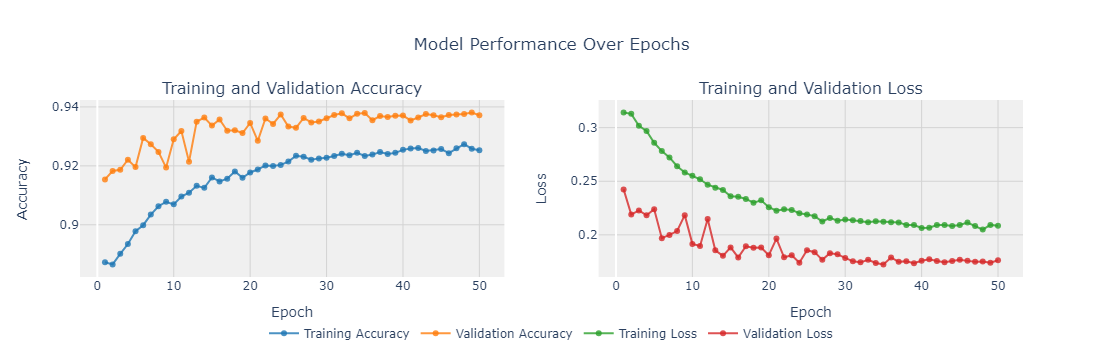

In [277]:
def create_trace(x, y, name, color):
    trace = go.Scatter(
        x=x,
        y=y,
        name=name,
        line=dict(color=color, width=2),
        mode="lines+markers",
        marker=dict(size=6),
        hovertemplate=f'{name}: %{y}<extra></extra>',  # Removed specific formatting
    )
    return trace

def plot_accuracy_and_loss(history):
    hist = history.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1, len(acc) + 1))

    # Create traces
    trace_ta = create_trace(epochs, acc, "Training Accuracy", "rgba(31, 119, 180, 0.8)")
    trace_va = create_trace(epochs, val_acc, "Validation Accuracy", "rgba(255, 127, 14, 0.8)")
    trace_tl = create_trace(epochs, loss, "Training Loss", "rgba(44, 160, 44, 0.8)")
    trace_vl = create_trace(epochs, val_loss, "Validation Loss", "rgba(214, 39, 40, 0.8)")

    # Subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Training and Validation Accuracy', 'Training and Validation Loss'))

    # Add traces to subplots
    fig.add_trace(trace_ta, row=1, col=1)
    fig.add_trace(trace_va, row=1, col=1)
    fig.add_trace(trace_tl, row=1, col=2)
    fig.add_trace(trace_vl, row=1, col=2)

    # Update layout for aesthetics
    fig.update_layout(
        title='Model Performance Over Epochs',
        title_x=0.5,
        xaxis_title='Epoch',
        xaxis2_title='Epoch',
        yaxis_title='Accuracy',
        yaxis2_title='Loss',
        legend=dict(orientation="h", yanchor="bottom", y=-0.4, xanchor="center", x=0.5),
        plot_bgcolor='rgba(240, 240, 240, 0.95)',
        font=dict(size=12)
    )

    # Update axes for consistency
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

    # Display the plot
    iplot(fig)

# Example usage
plot_accuracy_and_loss(history)

In [278]:
# Get the predicted probabilities for the test data
predicted_probabilities = model_new.predict(X)

# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Get the true class labels from the test data
y_true = np.argmax(Y,axis = 1)

# Now you can use predicted_classes and y_true for further evaluation or plotting

313/313 [==============================] - 5s 16ms/step


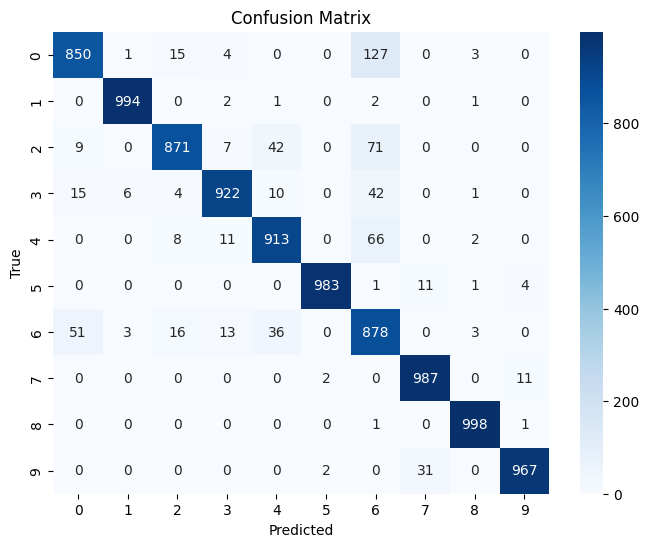

In [279]:
# Calculate the confusion matrix
cm = confusion_matrix(y_true, predicted_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [280]:
# Ensure predicted_classes and y_true are numpy arrays
p = np.array(predicted_classes[:10000])
y = np.array(y_true[:10000])

# Ensure that p and y have the same shape
assert p.shape == y.shape, f"Shape mismatch: predicted {p.shape}, true {y.shape}"

# Find indices of correct and incorrect predictions
correct = np.nonzero(p == y)[0]
incorrect = np.nonzero(p != y)[0]

# Output some details for verification
print(f"Number of correct predictions: {len(correct)}")
print(f"Number of incorrect predictions: {len(incorrect)}")

Number of correct predictions: 9363
Number of incorrect predictions: 637


In [281]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.92      0.85      0.88      1000
    Class 1 (Trouser) :       0.99      0.99      0.99      1000
   Class 2 (Pullover) :       0.95      0.87      0.91      1000
      Class 3 (Dress) :       0.96      0.92      0.94      1000
       Class 4 (Coat) :       0.91      0.91      0.91      1000
     Class 5 (Sandal) :       1.00      0.98      0.99      1000
      Class 6 (Shirt) :       0.74      0.88      0.80      1000
    Class 7 (Sneaker) :       0.96      0.99      0.97      1000
        Class 8 (Bag) :       0.99      1.00      0.99      1000
 Class 9 (Ankle Boot) :       0.98      0.97      0.98      1000

               accuracy                           0.94     10000
              macro avg       0.94      0.94      0.94     10000
           weighted avg       0.94      0.94      0.94     10000



In [361]:
value = 4578
y_pred_sample = model_new.predict(np.expand_dims(X[value], axis = 0)).round(2)
pred = np.argmax(y_pred_sample[0])

true_class_label = np.argmax(y_test[value])


print("Predicted Label is ", pred)
print("Actual Label is ", true_class_label)

1/1 [==============================] - 0s 85ms/step
Predicted Label is  1
Actual Label is  1


In [363]:
# Building a ConvNet (WITH SGD)

updated_model = Sequential()
updated_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
updated_model.add(BatchNormalization())

updated_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
updated_model.add(BatchNormalization())
updated_model.add(Dropout(0.25))

updated_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
updated_model.add(MaxPooling2D(pool_size=(2, 2)))
updated_model.add(Dropout(0.25))
    
    
updated_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
updated_model.add(BatchNormalization())
updated_model.add(Dropout(0.25))

updated_model.add(Flatten())
updated_model.add(Dense(512, activation='relu'))
updated_model.add(BatchNormalization())
updated_model.add(Dropout(0.5)) 
updated_model.add(Dense(128, activation='relu'))
updated_model.add(BatchNormalization())
updated_model.add(Dropout(0.5))
updated_model.add(Dense(10, activation='softmax'))

In [364]:
# Optimizer
optimizer = SGD(learning_rate=0.01)
# Compiling the model
updated_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [291]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [365]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images

In [366]:
datagen.fit(x_train)

In [367]:
batch_size = 128
epochs = 50

In [296]:
# Fit the Model
history_sgd = updated_model.fit(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Epoch 1/50
375/375 - 138s - loss: 1.5607 - accuracy: 0.4921 - val_loss: 0.8772 - val_accuracy: 0.6654 - lr: 0.0010 - 138s/epoch - 368ms/step
Epoch 2/50
375/375 - 113s - loss: 1.2977 - accuracy: 0.5635 - val_loss: 0.6931 - val_accuracy: 0.7400 - lr: 9.0000e-04 - 113s/epoch - 302ms/step
Epoch 3/50
375/375 - 134s - loss: 1.1765 - accuracy: 0.5994 - val_loss: 0.6552 - val_accuracy: 0.7541 - lr: 8.1000e-04 - 134s/epoch - 357ms/step
Epoch 4/50
375/375 - 117s - loss: 1.1136 - accuracy: 0.6183 - val_loss: 0.6365 - val_accuracy: 0.7604 - lr: 7.2900e-04 - 117s/epoch - 313ms/step
Epoch 5/50
375/375 - 131s - loss: 1.0516 - accuracy: 0.6339 - val_loss: 0.6159 - val_accuracy: 0.7676 - lr: 6.5610e-04 - 131s/epoch - 351ms/step
Epoch 6/50
375/375 - 115s - loss: 1.0316 - accuracy: 0.6398 - val_loss: 0.6093 - val_accuracy: 0.7683 - lr: 5.9049e-04 - 115s/epoch - 307ms/step
Epoch 7/50
375/375 - 132s - loss: 0.9920 - accuracy: 0.6518 - val_loss: 0.6026 - val_accuracy: 0.7688 - lr: 5.3144e-04 - 132s/epoch - 

In [297]:
X = df_test
Y = to_categorical(test.iloc[:,0])

In [311]:
score = updated_model.evaluate(X,Y, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 0.552061140537262
Test Accuracy: 0.7922000288963318


In [298]:
score = updated_model.evaluate(X,Y)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 5s 14ms/step - loss: 0.5521 - accuracy: 0.7922
Loss: 0.5521
Accuracy: 0.7922


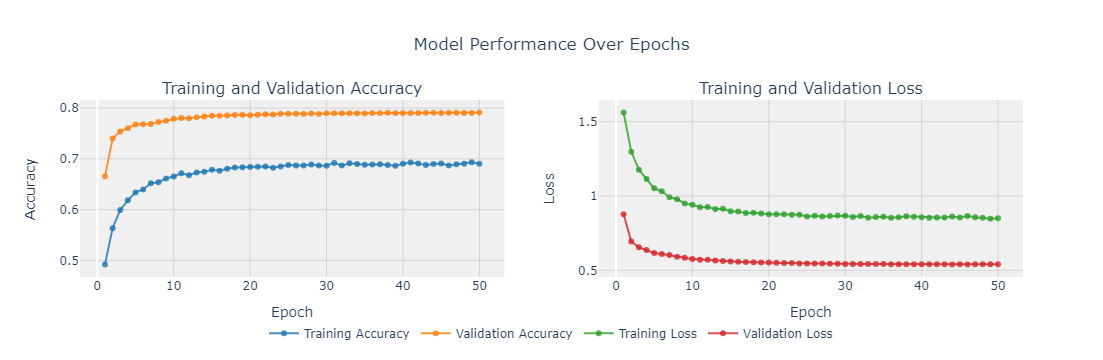

In [299]:
def create_trace(x, y, name, color):
    trace = go.Scatter(
        x=x,
        y=y,
        name=name,
        line=dict(color=color, width=2),
        mode="lines+markers",
        marker=dict(size=6),
        hovertemplate=f'{name}: %{y}<extra></extra>',  # Removed specific formatting
    )
    return trace

def plot_accuracy_and_loss(history_sgd):
    hist = history_sgd.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1, len(acc) + 1))

    # Create traces
    trace_ta = create_trace(epochs, acc, "Training Accuracy", "rgba(31, 119, 180, 0.8)")
    trace_va = create_trace(epochs, val_acc, "Validation Accuracy", "rgba(255, 127, 14, 0.8)")
    trace_tl = create_trace(epochs, loss, "Training Loss", "rgba(44, 160, 44, 0.8)")
    trace_vl = create_trace(epochs, val_loss, "Validation Loss", "rgba(214, 39, 40, 0.8)")

    # Subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Training and Validation Accuracy', 'Training and Validation Loss'))

    # Add traces to subplots
    fig.add_trace(trace_ta, row=1, col=1)
    fig.add_trace(trace_va, row=1, col=1)
    fig.add_trace(trace_tl, row=1, col=2)
    fig.add_trace(trace_vl, row=1, col=2)

    # Update layout for aesthetics
    fig.update_layout(
        title='Model Performance Over Epochs',
        title_x=0.5,
        xaxis_title='Epoch',
        xaxis2_title='Epoch',
        yaxis_title='Accuracy',
        yaxis2_title='Loss',
        legend=dict(orientation="h", yanchor="bottom", y=-0.4, xanchor="center", x=0.5),
        plot_bgcolor='rgba(240, 240, 240, 0.95)',
        font=dict(size=12)
    )

    # Update axes for consistency
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

    # Display the plot
    iplot(fig)

# Example usage
plot_accuracy_and_loss(history_sgd)

In [301]:
# Get the predicted probabilities for the test data
predicted_probabilities = updated_model.predict(X)

# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Get the true class labels from the test data
y_true = np.argmax(Y,axis = 1)

# Now you can use predicted_classes and y_true for further evaluation or plotting


313/313 [==============================] - 5s 14ms/step


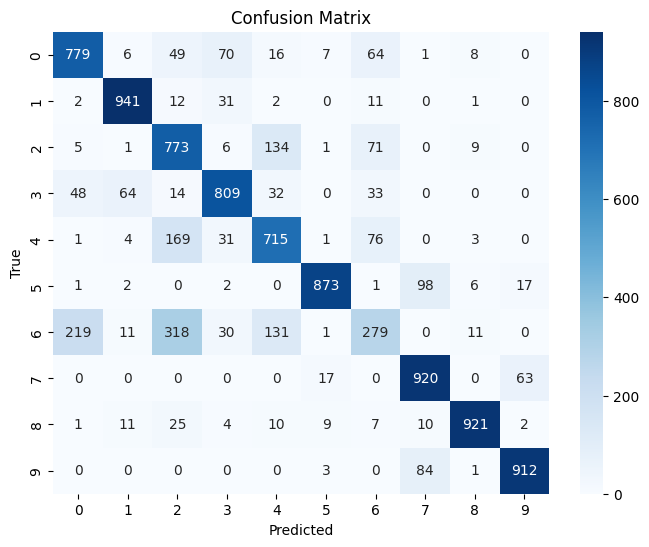

In [302]:
# Calculate the confusion matrix
cm = confusion_matrix(y_true, predicted_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [303]:
# Ensure predicted_classes and y_true are numpy arrays
p = np.array(predicted_classes[:10000])
y = np.array(y_true[:10000])

# Ensure that p and y have the same shape
assert p.shape == y.shape, f"Shape mismatch: predicted {p.shape}, true {y.shape}"

# Find indices of correct and incorrect predictions
correct = np.nonzero(p == y)[0]
incorrect = np.nonzero(p != y)[0]

# Output some details for verification
print(f"Number of correct predictions: {len(correct)}")
print(f"Number of incorrect predictions: {len(incorrect)}")

Number of correct predictions: 7922
Number of incorrect predictions: 2078


In [304]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.74      0.78      0.76      1000
    Class 1 (Trouser) :       0.90      0.94      0.92      1000
   Class 2 (Pullover) :       0.57      0.77      0.66      1000
      Class 3 (Dress) :       0.82      0.81      0.82      1000
       Class 4 (Coat) :       0.69      0.71      0.70      1000
     Class 5 (Sandal) :       0.96      0.87      0.91      1000
      Class 6 (Shirt) :       0.51      0.28      0.36      1000
    Class 7 (Sneaker) :       0.83      0.92      0.87      1000
        Class 8 (Bag) :       0.96      0.92      0.94      1000
 Class 9 (Ankle Boot) :       0.92      0.91      0.91      1000

               accuracy                           0.79     10000
              macro avg       0.79      0.79      0.79     10000
           weighted avg       0.79      0.79      0.79     10000



In [407]:
y_test.shape

(12000, 10)

In [408]:
# Fit the Model
history_sgd_withoutlr = updated_model.fit(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
375/375 - 149s - loss: 0.7854 - accuracy: 0.7089 - val_loss: 0.5050 - val_accuracy: 0.8060 - 149s/epoch - 397ms/step
Epoch 2/50
375/375 - 149s - loss: 0.5337 - accuracy: 0.8058 - val_loss: 0.3418 - val_accuracy: 0.8755 - 149s/epoch - 398ms/step
Epoch 3/50
375/375 - 156s - loss: 0.4587 - accuracy: 0.8332 - val_loss: 0.3410 - val_accuracy: 0.8751 - 156s/epoch - 416ms/step
Epoch 4/50
375/375 - 162s - loss: 0.4194 - accuracy: 0.8493 - val_loss: 0.3244 - val_accuracy: 0.8770 - 162s/epoch - 432ms/step
Epoch 5/50
375/375 - 157s - loss: 0.4010 - accuracy: 0.8556 - val_loss: 0.3060 - val_accuracy: 0.8874 - 157s/epoch - 418ms/step
Epoch 6/50
375/375 - 159s - loss: 0.3819 - accuracy: 0.8633 - val_loss: 0.2899 - val_accuracy: 0.8953 - 159s/epoch - 423ms/step
Epoch 7/50
375/375 - 171s - loss: 0.3684 - accuracy: 0.8675 - val_loss: 0.2907 - val_accuracy: 0.8938 - 171s/epoch - 457ms/step
Epoch 8/50
375/375 - 233s - loss: 0.3574 - accuracy: 0.8723 - val_loss: 0.3233 - val_accuracy: 0.8815 - 

In [409]:
X = df_test
Y = to_categorical(test.iloc[:,0])

In [410]:
score = updated_model.evaluate(X,Y, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 0.18960542976856232
Test Accuracy: 0.9322999715805054


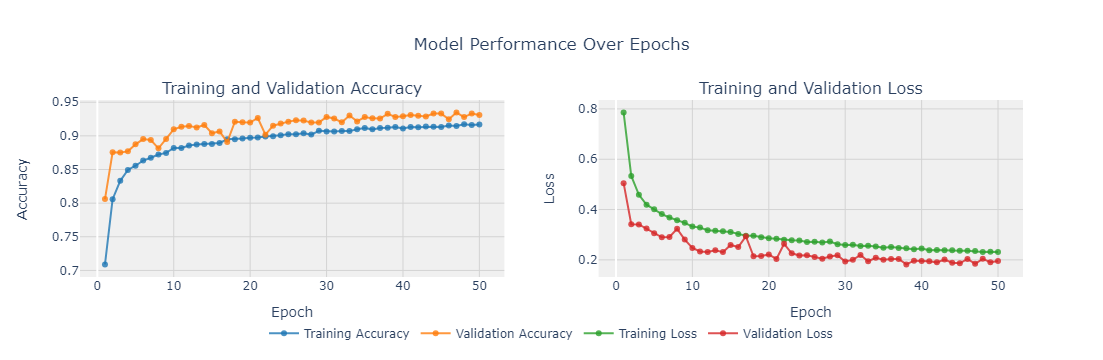

In [411]:
def create_trace(x, y, name, color):
    trace = go.Scatter(
        x=x,
        y=y,
        name=name,
        line=dict(color=color, width=2),
        mode="lines+markers",
        marker=dict(size=6),
        hovertemplate=f'{name}: %{y}<extra></extra>',  # Removed specific formatting
    )
    return trace

def plot_accuracy_and_loss(history_sgd_withoutlr):
    hist = history_sgd_withoutlr.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1, len(acc) + 1))

    # Create traces
    trace_ta = create_trace(epochs, acc, "Training Accuracy", "rgba(31, 119, 180, 0.8)")
    trace_va = create_trace(epochs, val_acc, "Validation Accuracy", "rgba(255, 127, 14, 0.8)")
    trace_tl = create_trace(epochs, loss, "Training Loss", "rgba(44, 160, 44, 0.8)")
    trace_vl = create_trace(epochs, val_loss, "Validation Loss", "rgba(214, 39, 40, 0.8)")

    # Subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Training and Validation Accuracy', 'Training and Validation Loss'))

    # Add traces to subplots
    fig.add_trace(trace_ta, row=1, col=1)
    fig.add_trace(trace_va, row=1, col=1)
    fig.add_trace(trace_tl, row=1, col=2)
    fig.add_trace(trace_vl, row=1, col=2)

    # Update layout for aesthetics
    fig.update_layout(
        title='Model Performance Over Epochs',
        title_x=0.5,
        xaxis_title='Epoch',
        xaxis2_title='Epoch',
        yaxis_title='Accuracy',
        yaxis2_title='Loss',
        legend=dict(orientation="h", yanchor="bottom", y=-0.4, xanchor="center", x=0.5),
        plot_bgcolor='rgba(240, 240, 240, 0.95)',
        font=dict(size=12)
    )

    # Update axes for consistency
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

    # Display the plot
    iplot(fig)

# Example usage
plot_accuracy_and_loss(history_sgd_withoutlr)

In [412]:
# Get the predicted probabilities for the test data
predicted_probabilities = updated_model.predict(X)

# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Get the true class labels from the test data
y_true = np.argmax(Y,axis = 1)

313/313 [==============================] - 10s 32ms/step


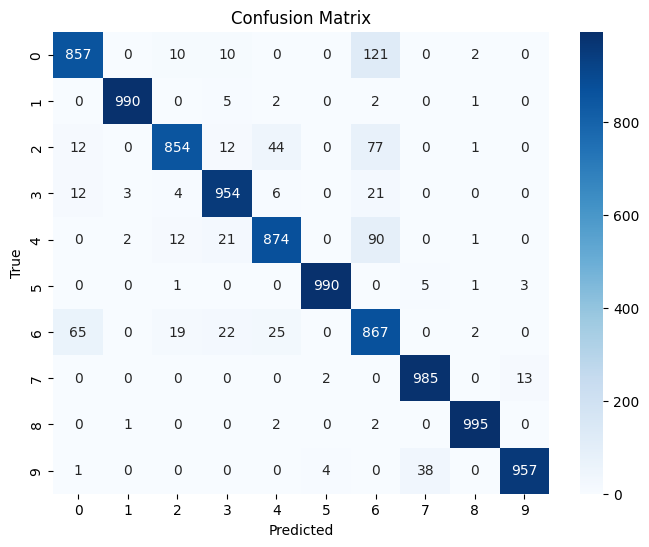

In [413]:
# Calculate the confusion matrix
cm = confusion_matrix(y_true, predicted_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [414]:
# Ensure predicted_classes and y_true are numpy arrays
p = np.array(predicted_classes[:10000])
y = np.array(y_true[:10000])

# Ensure that p and y have the same shape
assert p.shape == y.shape, f"Shape mismatch: predicted {p.shape}, true {y.shape}"

# Find indices of correct and incorrect predictions
correct = np.nonzero(p == y)[0]
incorrect = np.nonzero(p != y)[0]

# Output some details for verification
print(f"Number of correct predictions: {len(correct)}")
print(f"Number of incorrect predictions: {len(incorrect)}")

Number of correct predictions: 9323
Number of incorrect predictions: 677


In [415]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.90      0.86      0.88      1000
    Class 1 (Trouser) :       0.99      0.99      0.99      1000
   Class 2 (Pullover) :       0.95      0.85      0.90      1000
      Class 3 (Dress) :       0.93      0.95      0.94      1000
       Class 4 (Coat) :       0.92      0.87      0.90      1000
     Class 5 (Sandal) :       0.99      0.99      0.99      1000
      Class 6 (Shirt) :       0.73      0.87      0.80      1000
    Class 7 (Sneaker) :       0.96      0.98      0.97      1000
        Class 8 (Bag) :       0.99      0.99      0.99      1000
 Class 9 (Ankle Boot) :       0.98      0.96      0.97      1000

               accuracy                           0.93     10000
              macro avg       0.94      0.93      0.93     10000
           weighted avg       0.94      0.93      0.93     10000



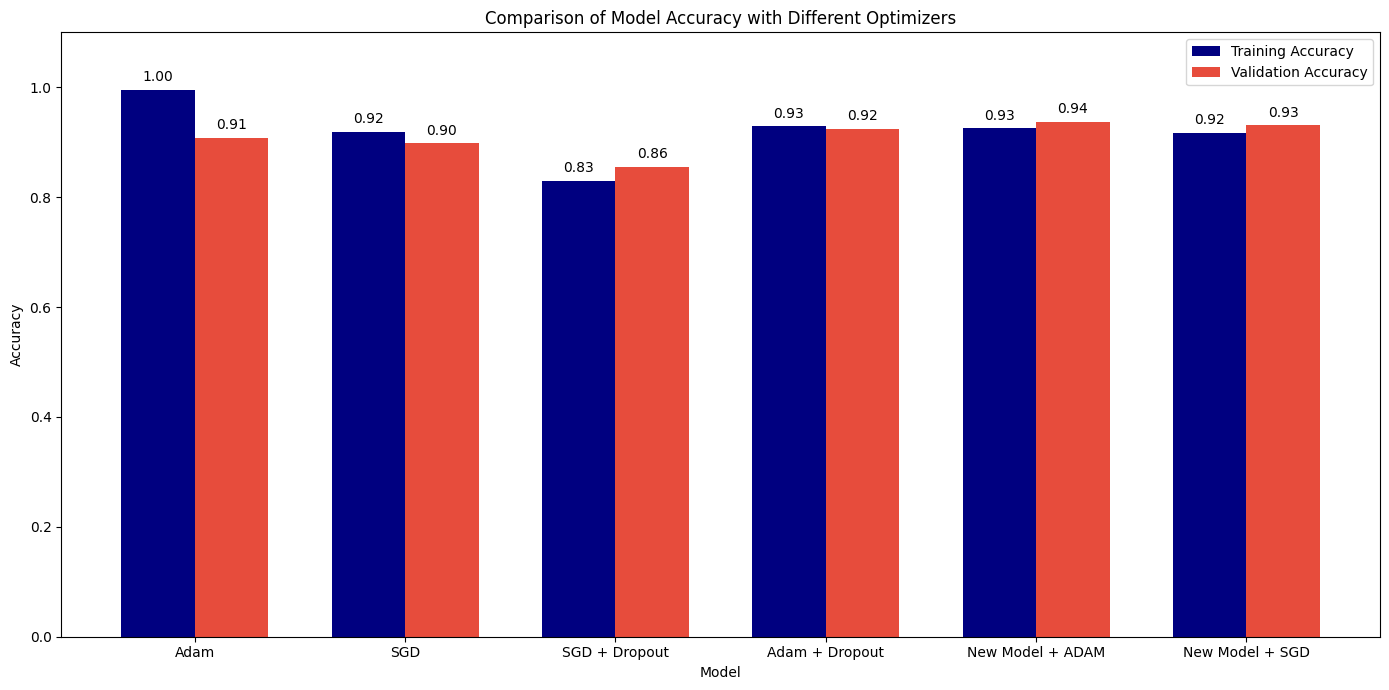

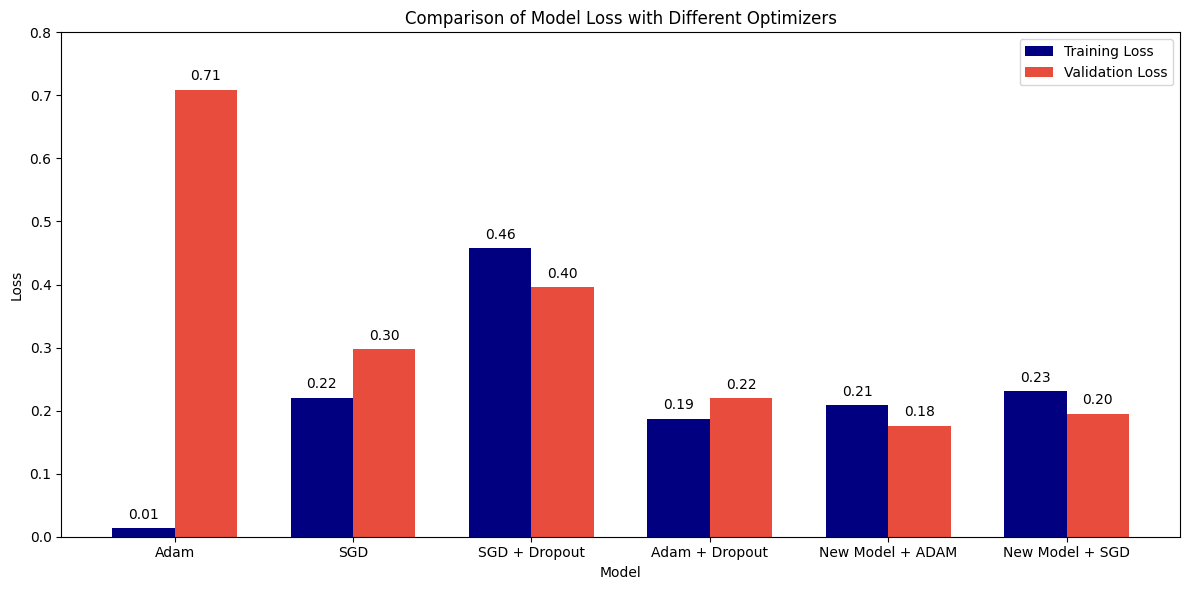

In [492]:
import matplotlib.pyplot as plt
import numpy as np

# Assume the training histories are stored in these variables
train_models = {
    'Adam': train_model_adam,
    'SGD': train_model,
    'SGD + Dropout': train_model_drop,
    'Adam + Dropout': train_model_drop_adam,
    'New Model + ADAM': history,
    'New Model + SGD': history_sgd_withoutlr
}

# Extract final epoch accuracy and loss from each model's history for training and validation
train_accuracies = {name: model.history['accuracy'][-1] for name, model in train_models.items()}
val_accuracies = {name: model.history['val_accuracy'][-1] for name, model in train_models.items()}
train_losses = {name: model.history['loss'][-1] for name, model in train_models.items()}
val_losses = {name: model.history['val_loss'][-1] for name, model in train_models.items()}

# Number of models
n_models = len(train_models)

# Width of each bar
bar_width = 0.35

# Positions for the bars on the x-axis
index = np.arange(n_models)

# Colors for the bars
train_color = 'navy'
val_color = '#E74C3C'  # A shade of red

# Plotting accuracy comparison histogram
plt.figure(figsize=(14, 7))  # Increased figure size

# Plot training accuracies
bars1 = plt.bar(index, train_accuracies.values(), bar_width, label='Training Accuracy', color=train_color)

# Plot validation accuracies next to the training bars
bars2 = plt.bar(index + bar_width, val_accuracies.values(), bar_width, label='Validation Accuracy', color=val_color)

plt.title('Comparison of Model Accuracy with Different Optimizers')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1.10])
plt.xticks(index + bar_width / 2, train_accuracies.keys(), rotation=0)
plt.legend()

# Annotate the bars with accuracy values
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', color='black')
    
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

# Plotting loss comparison histogram
plt.figure(figsize=(12, 6))

# Plot training losses
bars3 = plt.bar(index, train_losses.values(), bar_width, label='Training Loss', color=train_color)

# Plot validation losses next to the training bars
bars4 = plt.bar(index + bar_width, val_losses.values(), bar_width, label='Validation Loss', color=val_color)

plt.title('Comparison of Model Loss with Different Optimizers')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.ylim([0, 0.8])
plt.xticks(index + bar_width / 2, train_losses.keys(), rotation=0)
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjusted legend position
plt.legend()

# Annotate the bars with loss values
for bar in bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', color='black')
    
for bar in bars4:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()